In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn import svm

### CV for old features

In [5]:
train_set = pd.read_csv('data/train_nx_ig_v3.csv')
train_set.head()

id1      id2  res_allo_ind  overlap_title  temp_diff  comm_auth  \
0  9510123  9502114      0.142857              2          0          0   
1  9707075  9604178      0.226401              1          1          0   
2  9312155  9506142      0.000000              0         -2          0   
3  9911255   302165      0.000000              0         -4          0   
4  9701033   209076      0.000000              0         -5          0   

   reduced_tfidf_sim  jaccard_coeff  tgt_citation  labels  
0           0.242161       0.176471             8       1  
1           0.116740       0.106796           124       1  
2           0.067705       0.000000             2       0  
3           0.054771       0.000000             2       0  
4           0.220903       0.000000             2       0

In [6]:
X_train = train_set.iloc[:,2:-1]
y_train = train_set.iloc[:,-1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train, y_train = shuffle(X_train, y_train, random_state=0)

In [7]:
c_range = list(np.arange(0.1,1,0.1))+list(np.arange(1,10))+list(np.arange(10,1000,20))
f1_scores_old7f = []
for c in c_range:
    clf_svc = svm.LinearSVC(penalty='l2', C=c)
    scores_svc = cross_val_score(clf_svc, X_train, y_train, cv=5, scoring='f1')
    f1_scores_old7f.append(np.mean(scores_svc))

In [8]:
plt.plot(c_range, f1_scores_old7f)
plt.xlabel('Value of C')
plt.ylabel('Cross validation f1 score')
plt.title('LR')
plt.legend()
plt.show()

/home/wangsun/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


This result is overfitting because of jaccard coefficient

### with new features of Shiwen

In [9]:
train_set = pd.read_csv('data/train_treated.csv')
train_set.head()

id1      id2  link   rno1   rno2       sim  year1  year2  year_diff  \
0  9510123  9502114     1  16827  15446  0.064373   1995   1995          0   
1  9707075  9604178     1  21154  18059  0.021211   1997   1996          1   
2  9312155  9506142     0  13074  16171  0.017202   1993   1995         -2   
3  9911255   302165     0  27486   9702  0.012634   1999   2003         -4   
4  9701033   209076     0  19856   8212  0.059588   1997   2002         -5   

   common_authors  cn       aai  title_overlap  
0               0   1  0.513898              2  
1               0  20  4.320366              1  
2               0   0  0.000000              0  
3               0   0  0.000000              0  
4               0   0  0.000000              0

In [10]:
X_train = train_set.loc[:,['sim', 'year_diff', 'common_authors', 'cn', 'aai', 'title_overlap']]
y_train = train_set.loc[:,'link']
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train, y_train = shuffle(X_train, y_train, random_state=0)

In [11]:
c_range = list(np.arange(0.1,1,0.1))+list(np.arange(1,10))+list(np.arange(10,1000,20))
f1_scores_new5f = []
for c in c_range:
    clf_svc = svm.LinearSVC(penalty='l2', C=c)
    scores_svc = cross_val_score(clf_svc, X_train, y_train, cv=5, scoring='f1')
    f1_scores_new5f.append(np.mean(scores_svc))

In [12]:
plt.plot(c_range, f1_scores_new5f)
plt.xlabel('Value of C')
plt.ylabel('Cross validation f1 score')
plt.title('LR')
plt.legend()
plt.show()

/home/wangsun/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [18]:
list(zip(c_range,f1_scores_new5f))

[(0.1, 0.9076774451683134),
 (0.2, 0.9214110638256525),
 (0.30000000000000004, 0.928209224805264),
 (0.4, 0.9324409263092166),
 (0.5, 0.9356139615630802),
 (0.6, 0.9378887444408285),
 (0.7000000000000001, 0.9397064449379595),
 (0.8, 0.9411429721735536),
 (0.9, 0.9424023907849577),
 (1, 0.9434546385314269),
 (2, 0.9494095519589578),
 (3, 0.9520244517457643),
 (4, 0.9536030785551082),
 (5, 0.9546096368854202),
 (6, 0.9553140025816635),
 (7, 0.9558491902087265),
 (8, 0.956275607999404),
 (9, 0.9565391964180071),
 (10, 0.956866292006114),
 (30, 0.9590609609247277),
 (50, 0.9597925216343807),
 (70, 0.96028197504288),
 (90, 0.9603747693478928),
 (110, 0.9606018290273296),
 (130, 0.96062562198744),
 (150, 0.9605728413552226),
 (170, 0.960035805205734),
 (190, 0.9602416909114553),
 (210, 0.9629301998230588),
 (230, 0.9612220161638616),
 (250, 0.9617927137319988),
 (270, 0.9612220291472349),
 (290, 0.9587044294547875),
 (310, 0.9577086475958753),
 (330, 0.9610897562076758),
 (350, 0.96073637019

This result is not overfitting.

### replace 5 old features with 5 new ones

In [13]:
train1 = pd.read_csv('data/train_treated.csv')
train1.head()

id1      id2  link   rno1   rno2       sim  year1  year2  year_diff  \
0  9510123  9502114     1  16827  15446  0.064373   1995   1995          0   
1  9707075  9604178     1  21154  18059  0.021211   1997   1996          1   
2  9312155  9506142     0  13074  16171  0.017202   1993   1995         -2   
3  9911255   302165     0  27486   9702  0.012634   1999   2003         -4   
4  9701033   209076     0  19856   8212  0.059588   1997   2002         -5   

   common_authors  cn       aai  title_overlap  
0               0   1  0.513898              2  
1               0  20  4.320366              1  
2               0   0  0.000000              0  
3               0   0  0.000000              0  
4               0   0  0.000000              0

In [14]:
train2 = pd.read_csv('data/train_nx_ig_v3.csv')
train2.head()

id1      id2  res_allo_ind  overlap_title  temp_diff  comm_auth  \
0  9510123  9502114      0.142857              2          0          0   
1  9707075  9604178      0.226401              1          1          0   
2  9312155  9506142      0.000000              0         -2          0   
3  9911255   302165      0.000000              0         -4          0   
4  9701033   209076      0.000000              0         -5          0   

   reduced_tfidf_sim  jaccard_coeff  tgt_citation  labels  
0           0.242161       0.176471             8       1  
1           0.116740       0.106796           124       1  
2           0.067705       0.000000             2       0  
3           0.054771       0.000000             2       0  
4           0.220903       0.000000             2       0

In [15]:
X_train = pd.concat([train1.loc[:,['title_overlap', 'year_diff','common_authors','sim','cn','aai']], train2.loc[:,['jaccard_coeff','tgt_citation']]], axis=1)
y_train = train1.loc[:,'link']
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train, y_train = shuffle(X_train, y_train, random_state=0)

In [16]:
c_range = list(np.arange(0.1,1,0.1))+list(np.arange(1,10))+list(np.arange(10,1000,20))
f1_scores_new7f = []
for c in c_range:
    clf_svc = svm.LinearSVC(penalty='l2', C=c)
    scores_svc = cross_val_score(clf_svc, X_train, y_train, cv=5, scoring='f1')
    f1_scores_new7f.append(np.mean(scores_svc))

/home/wangsun/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


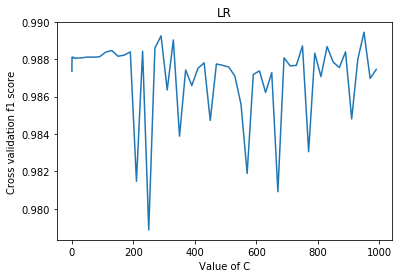

In [17]:
plt.plot(c_range, f1_scores_new7f)
plt.xlabel('Value of C')
plt.ylabel('Cross validation f1 score')
plt.title('LR')
plt.legend()
plt.show()

This result is overfitting because of jaccard coefficient

### Trials of features

#### 6 new features + tgt citation

In [2]:
train1 = pd.read_csv('data/train_treated.csv')
train2 = pd.read_csv('data/train_nx_ig_v2.csv')
X_train = pd.concat([train1.loc[:,['title_overlap', 'year_diff','common_authors','sim','cn','aai']], train2.loc[:,['tgt_citation']]], axis=1)
y_train = train1.loc[:,'link']
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train, y_train = shuffle(X_train, y_train, random_state=0)

In [3]:
c_range = list(np.arange(0.1,1,0.1))+list(np.arange(1,10))+list(np.arange(10,1000,20))
f1_scores_new6f_tgt = []
for c in c_range:
    clf_svc = svm.LinearSVC(penalty='l2', C=c)
    scores_svc = cross_val_score(clf_svc, X_train, y_train, cv=5, scoring='f1')
    f1_scores_new6f_tgt.append(np.mean(scores_svc))

/home/wangsun/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


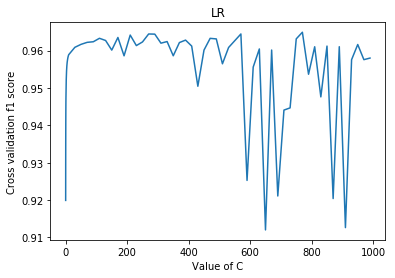

In [4]:
plt.plot(c_range, f1_scores_new6f_tgt)
plt.xlabel('Value of C')
plt.ylabel('Cross validation f1 score')
plt.title('LR')
plt.legend()
plt.show()

#### 6 new features + tgt citation + rai

In [5]:
train1 = pd.read_csv('data/train_treated.csv')
train2 = pd.read_csv('data/train_nx_ig_v2.csv')
X_train = pd.concat([train1.loc[:,['title_overlap', 'year_diff','common_authors','sim','cn','aai']], train2.loc[:,['res_allo_ind','tgt_citation']]], axis=1)
y_train = train1.loc[:,'link']
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train, y_train = shuffle(X_train, y_train, random_state=0)

In [6]:
c_range = list(np.arange(0.1,1,0.1))+list(np.arange(1,10))+list(np.arange(10,1000,20))
f1_scores_new6f_tgt_rai = []
for c in c_range:
    clf_svc = svm.LinearSVC(penalty='l2', C=c)
    scores_svc = cross_val_score(clf_svc, X_train, y_train, cv=5, scoring='f1')
    f1_scores_new6f_tgt_rai.append(np.mean(scores_svc))

/home/wangsun/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


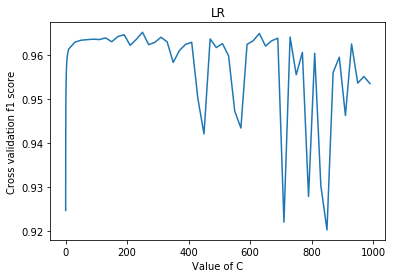

In [7]:
plt.plot(c_range, f1_scores_new6f_tgt_rai)
plt.xlabel('Value of C')
plt.ylabel('Cross validation f1 score')
plt.title('LR')
plt.legend()
plt.show()

#### 6 new features + tgt citation + rai + jaccard_nx

In [8]:
train1 = pd.read_csv('data/train_treated.csv')
train2 = pd.read_csv('data/train_nx_ig_v2.csv')
X_train = pd.concat([train1.loc[:,['title_overlap', 'year_diff','common_authors','sim','cn','aai']], train2.loc[:,['res_allo_ind','tgt_citation', 'jaccard_nx']]], axis=1)
y_train = train1.loc[:,'link']
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train, y_train = shuffle(X_train, y_train, random_state=0)

In [9]:
c_range = list(np.arange(0.1,1,0.1))+list(np.arange(1,10))+list(np.arange(10,1000,20))
f1_scores_new6f_tgt_rai_jnx = []
for c in c_range:
    clf_svc = svm.LinearSVC(penalty='l2', C=c)
    scores_svc = cross_val_score(clf_svc, X_train, y_train, cv=5, scoring='f1')
    f1_scores_new6f_tgt_rai_jnx.append(np.mean(scores_svc))

/home/wangsun/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


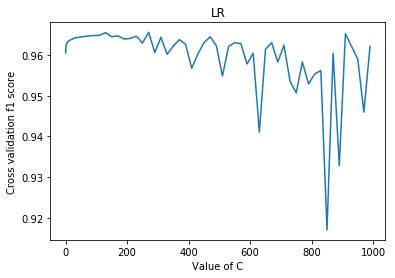

In [10]:
plt.plot(c_range, f1_scores_new6f_tgt_rai_jnx)
plt.xlabel('Value of C')
plt.ylabel('Cross validation f1 score')
plt.title('LR')
plt.legend()
plt.show()

### Train, predict and output

In [ ]:
clf_svc = svm.LinearSVC(penalty='l2', C=)
# clf_svc_poly = svm.SVC(C=, kernel='poly', degree=2)
clf_svc.fit(X_train, y_train)

In [ ]:
test_set = pd.read_csv('data/test_nx_ig_v3.csv')
X_test = test_set.iloc[:,2:]
y_test = clf_svc.predict(X_test)
# y_test = clf_svc_poly.predict(X_test)

In [ ]:
df = pd.DataFrame(y_test, columns=['category'])
df.index.name = 'id'
df.to_csv('result/svm1.csv', index=True, header=True)
# df.to_csv('result/svm2.csv', index=True, header=False)

#### new new features

### to stack

In [2]:
train1 = pd.read_csv('../data/train_stacked.csv')
train2 = pd.read_csv('../data/train_nx_ig_v2.csv')
X_train = pd.concat([train1.loc[:,['sim','cn','year_diff','common_authors','title_overlap','journal_overlap','centroid_sim','wmd']], train2.loc[:,['tgt_citation','jaccard_nx']]], axis=1)
y_train = train1.loc[:,'link']
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

# X_train_cv, y_train_cv = shuffle(X_train, y_train, random_state=0)
# clf_svc = svm.LinearSVC(penalty='l2', C=200)
# print (cross_val_score(clf_svc, X_train_cv, y_train_cv, cv=5, scoring='f1'))

In [3]:
clf_svc = svm.LinearSVC(penalty='l2', C=200)
clf_svc.fit(X_train, y_train)
# y_train_pred = clf_svc.predict(X_train)
# train1['svc_stack'] = y_train_pred
# train1.to_csv('../data/train_stacked.csv', index=False)

test1 = pd.read_csv('../data/test_stacked.csv')
test2 = pd.read_csv('../data/test_nx_ig_v2.csv')
X_test = pd.concat([test1.loc[:,['sim','cn','year_diff','common_authors','title_overlap','journal_overlap','centroid_sim','wmd']], test2.loc[:,['tgt_citation','jaccard_nx']]], axis=1)
X_test = scaler.transform(X_test)
y_test_pred = clf_svc.predict(X_test)
# test1['svc_stack'] = y_test_pred
# test1.to_csv('../data/test_stacked.csv', index=False)

In [4]:
df = pd.DataFrame(y_test_pred, columns=['category'])
df.index.name = 'id'
df.to_csv('../result/svc_new3.csv', index=True, header=True)